# Sales Analysis for Fun (Demo)

#### Import necessary libraries

In [1]:
import os
import pandas as pd
import glob

#### Merge data from each month into one CSV

In [2]:
os.chdir("./Sales_Data")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

#### Read in updated dataframe

In [3]:
df = pd.read_csv('combined_csv.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data Exploration!

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747400 entries, 0 to 747399
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          745220 non-null  object
 1   Product           745220 non-null  object
 2   Quantity Ordered  745220 non-null  object
 3   Price Each        745220 non-null  object
 4   Order Date        745220 non-null  object
 5   Purchase Address  745220 non-null  object
dtypes: object(6)
memory usage: 34.2+ MB


In [5]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,745220,745220,745220,745220,745220,745220
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,1420,87612,674208,87612,1420,1420


* It seems like we read all headers as a row. We should remove inappropriate values!

In [6]:
df = df[df['Order Date'].str[0:2] != 'Or']

In [7]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,743800,743800,743800,743800,743800,743800
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,20,87612,674208,87612,32,36


In [8]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

* Let's correctly classified the attribute types!

In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


* Before doing that let's check if there is any missing values. Because we cannot convert column type if column contains NaN's

In [10]:
df.isna().sum()

Order ID            2180
Product             2180
Quantity Ordered    2180
Price Each          2180
Order Date          2180
Purchase Address    2180
dtype: int64

* There are so many! We must drop them.

In [11]:
df.dropna(inplace=True)

* We can convert the dtypes now. It may takes some time! 

In [12]:
df = df.astype({'Order ID': 'int64', 'Quantity Ordered': 'int64', 'Price Each': 'float64', 'Order Date': 'datetime64'})

In [13]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


## Data Analysis!

#### Question 1: What was the best month for sales?

In [14]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each'] # Adding sales column to the dataframe

In [15]:
df['Month'] = df['Order Date'].dt.month # Adding month column to the dataframe

In [16]:
df.groupby(['Month']).sum().sort_values(['Sales'], ascending=False)

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
12,30743618820,112456,1.835366e+07,1.845377e+07
10,21828441532,90812,1.486222e+07,1.494691e+07
4,13549388400,82232,1.347068e+07,1.356268e+07
11,20188810292,79192,1.272240e+07,1.279841e+07
5,13383486092,74668,1.254050e+07,1.261043e+07
3,10259243824,68020,1.116483e+07,1.122840e+07
7,13136558304,64288,1.053016e+07,1.059110e+07
6,11731904288,61012,1.024810e+07,1.031121e+07
8,11597495668,53792,8.921382e+06,8.977872e+06


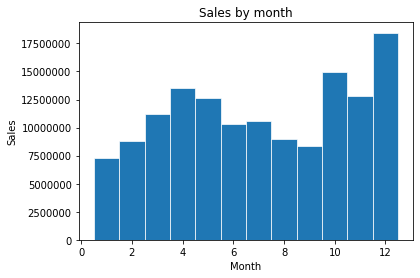

In [17]:
import matplotlib.pyplot as plt

result = df.groupby(['Month']).sum().sort_values(['Sales'], ascending=False)

x = result.index
y = result['Sales']

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.ticklabel_format(style='plain')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.set_title('Sales by month')

plt.show()

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


#### Question 2: What city sold the most product?

In [19]:
# Extracting city and state from the full purchase address

def extract_city(address):
    return address.split(",")[1].strip(" ")

def extract_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{extract_city(x)}  ({extract_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)


In [20]:
df.groupby(['City']).sum().sort_values(['Sales'], ascending=False)

,Order ID,Quantity Ordered,Price Each,Sales,Month
City,,,,,
San Francisco (CA),41217775808,200956,3.284585e+07,3.304882e+07,1262080
Los Angeles (CA),27244338772,133156,2.168574e+07,2.181028e+07,833300
New York City (NY),22945335536,111728,1.854148e+07,1.865727e+07,702964
Boston (MA),18393061044,90112,1.454964e+07,1.464657e+07,564448
Atlanta (GA),13695353628,66408,1.111963e+07,1.118199e+07,419176
Dallas (TX),13662574312,66920,1.101051e+07,1.107190e+07,418480
Seattle (WA),13626775896,66212,1.093318e+07,1.099102e+07,419764
Portland (OR),9222378988,45212,7.442233e+06,7.482929e+06,282484
Austin (TX),9123928740,44612,7.239494e+06,7.278327e+06,279316


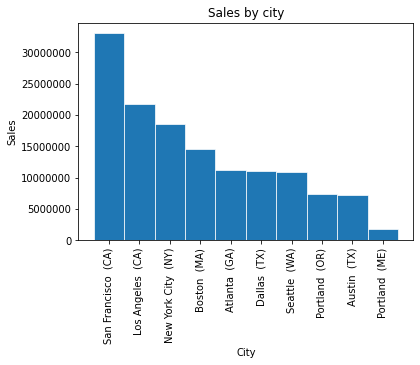

In [21]:
result = df.groupby(['City']).sum().sort_values(['Sales'], ascending=False)

x = result.index
y = result['Sales']

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.ticklabel_format(axis= 'y', style='plain')
ax.set_xlabel('City', )
ax.set_ylabel('Sales')
ax.set_title('Sales by city')
plt.xticks(rotation=90)

plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [22]:
# Extracting hour from the timestamp

df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),9


In [23]:
df['Count'] = 1 # we count each sales as 1 and sum number of sales between the hours
df.groupby(['Hour']).count().sort_values(['Count'], ascending=False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Count
Hour,,,,,,,,,,
19,51620,51620,51620,51620,51620,51620,51620,51620,51620,51620
12,50348,50348,50348,50348,50348,50348,50348,50348,50348,50348
11,49644,49644,49644,49644,49644,49644,49644,49644,49644,49644
18,49120,49120,49120,49120,49120,49120,49120,49120,49120,49120
20,48912,48912,48912,48912,48912,48912,48912,48912,48912,48912
13,48516,48516,48516,48516,48516,48516,48516,48516,48516,48516
14,43936,43936,43936,43936,43936,43936,43936,43936,43936,43936
10,43776,43776,43776,43776,43776,43776,43776,43776,43776,43776
21,43684,43684,43684,43684,43684,43684,43684,43684,43684,43684


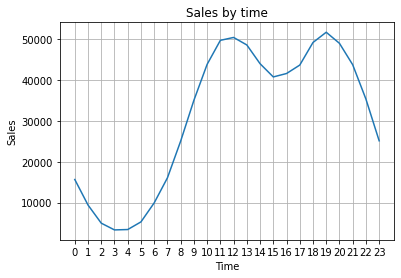

In [24]:
import numpy as np

keys = [pair for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Sales by time')
plt.show()

* I recommend to display ads before 12:00 or 19:00.

#### Question 4: What products are most often sold together?

In [25]:
# I keep the each transaction which has the duplicated order id
df2 = df[df['Order ID'].duplicated(keep=False)]

# I make a new column and this columns contains both products which was sold in the same transcation
df2['List'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Make a new dataframe and put the order ID and new product list column and drop duplicates
df3 = df2[['Order ID', 'List']].drop_duplicates()

In [26]:
# Now, we can count product pair most often sold together
from itertools import combinations
from collections import Counter

count = Counter()

for row in df3['List']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # if you change 2 to 3, you can find 3 products sold together

for key,value in count.most_common(10):
    print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 132186
('Lightning Charging Cable', 'Lightning Charging Cable') 130812
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 124614
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 124022
('Wired Headphones', 'Wired Headphones') 113852
('Apple Airpods Headphones', 'Apple Airpods Headphones') 93678
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 80382
('27in FHD Monitor', '27in FHD Monitor') 45186
('iPhone', 'iPhone') 41084
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 37460


#### Question 5: What product sold the most? Why do you think it sold the most?

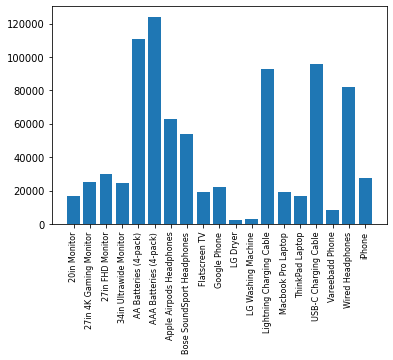

In [27]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### Question 6: How is the relationship between the price of the products and sales?

C:\Users\80300609\AppData\Local\Temp/ipykernel_2164/2473417662.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\80300609\AppData\Local\Temp/ipykernel_2164/2473417662.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


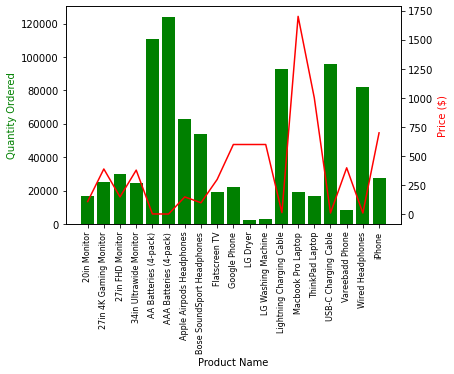

In [28]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

* Theoretically speaking, we can see that there is a negative correlation between the product price and sales.